In [ ]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline
# %matplotlib notebook
plt.rcParams["figure.figsize"] = (6,6)
# plt.rcParams['figure.dpi'] = 100
sns.set_style("whitegrid")
#pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.options.display.float_format = '{:,.2f}'.format

In [ ]:
data_path = '/content/neo.csv'
data = pd.read_csv(data_path)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [ ]:
data.isnull().sum()

id                    0
name                  0
est_diameter_min      0
est_diameter_max      0
relative_velocity     0
miss_distance         0
orbiting_body         0
sentry_object         0
absolute_magnitude    0
hazardous             0
dtype: int64

In [ ]:
data.describe()

id  est_diameter_min  est_diameter_max  relative_velocity  \
count     90,836.00         90,836.00         90,836.00          90,836.00   
mean  14,382,878.05              0.13              0.28          48,066.92   
std   20,872,018.35              0.30              0.67          25,293.30   
min    2,000,433.00              0.00              0.00             203.35   
25%    3,448,110.00              0.02              0.04          28,619.02   
50%    3,748,362.00              0.05              0.11          44,190.12   
75%    3,884,023.00              0.14              0.32          62,923.60   
max   54,275,914.00             37.89             84.73         236,990.13   

       miss_distance  absolute_magnitude  
count      90,836.00           90,836.00  
mean   37,066,546.03               23.53  
std    22,352,040.60                2.89  
min         6,745.53                9.23  
25%    17,210,820.24               21.34  
50%    37,846,579.26               23.70  
75%    56,548,996.45               25.70  
max    74,798,651.45               33.20

In [ ]:
data.head(10)

id                 name  est_diameter_min  est_diameter_max  \
0   2162635  162635 (2000 SS164)              1.20              2.68   
1   2277475    277475 (2005 WK4)              0.27              0.59   
2   2512244   512244 (2015 YE18)              0.72              1.61   
3   3596030          (2012 BV13)              0.10              0.22   
4   3667127          (2014 GE35)              0.26              0.57   
5  54138696          (2021 GY23)              0.04              0.08   
6  54189957          (2021 PY40)              0.17              0.38   
7  54230078           (2021 XD6)              0.01              0.01   
8   2088213     88213 (2001 AF2)              0.35              0.78   
9   3766065            (2016 YM)              0.11              0.24   

   relative_velocity  miss_distance orbiting_body  sentry_object  \
0          13,569.25  54,839,744.08         Earth          False   
1          73,588.73  61,438,126.52         Earth          False   
2         114,258.69  49,798,724.94         Earth          False   
3          24,764.30  25,434,972.72         Earth          False   
4          42,737.73  46,275,567.00         Earth          False   
5          34,297.59  40,585,691.23         Earth          False   
6          27,529.47  29,069,121.42         Earth          False   
7          57,544.47  55,115,019.26         Earth          False   
8          56,625.21  69,035,980.04         Earth          False   
9          48,425.84  38,355,261.56         Earth          False   

   absolute_magnitude  hazardous  
0               16.73      False  
1               20.00       True  
2               17.83      False  
3               22.20      False  
4               20.09       True  
5               24.32      False  
6               20.95      False  
7               28.49      False  
8               19.40      False  
9               22.00      False

In [ ]:
!pip install pandas-profiling[notebook]

In [ ]:
pip install ydata-profiling

In [ ]:
import pandas as pd
from ydata_profiling import ProfileReport

profiling = ProfileReport(data, title = "NASA - Nearest Earth Objects")
profiling.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

columns_to_encode = ['orbiting_body','hazardous']

# Create a OneHotEncoder instance
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')

# Encode the specified columns
encoded_columns = one_hot_encoder.fit_transform(data[columns_to_encode])

# Create column names for the encoded features
encoded_column_names = one_hot_encoder.get_feature_names_out(columns_to_encode)

# Reset the index of the DataFrame
data.reset_index(drop=True, inplace=True)

# Replace the original columns with the encoded ones
df_encoded = pd.concat([data.drop(columns_to_encode, axis=1), pd.DataFrame(encoded_columns, columns=encoded_column_names)],axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X = df_encoded
X = X.drop(columns=['id', 'name', 'sentry_object'])
X

est_diameter_min  est_diameter_max  relative_velocity  miss_distance  \
0                  1.20              2.68          13,569.25  54,839,744.08   
1                  0.27              0.59          73,588.73  61,438,126.52   
2                  0.72              1.61         114,258.69  49,798,724.94   
3                  0.10              0.22          24,764.30  25,434,972.72   
4                  0.26              0.57          42,737.73  46,275,567.00   
...                 ...               ...                ...            ...   
90831              0.03              0.06          52,078.89  12,300,389.18   
90832              0.02              0.04          46,114.61  54,321,206.42   
90833              0.03              0.07           7,566.81  28,400,768.16   
90834              0.01              0.02          69,199.15  68,692,060.53   
90835              0.04              0.09          27,024.46  59,772,130.59   

       absolute_magnitude  hazardous_True  
0                   16.73            0.00  
1                   20.00            1.00  
2                   17.83            0.00  
3                   22.20            0.00  
4                   20.09            1.00  
...                   ...             ...  
90831               25.00            0.00  
90832               26.00            0.00  
90833               24.60            0.00  
90834               27.80            0.00  
90835               24.12            0.00  

[90836 rows x 6 columns]

In [ ]:
y = X['hazardous_True'].copy()
X = X.drop(columns=['hazardous_True'])
X

est_diameter_min  est_diameter_max  relative_velocity  miss_distance  \
0                  1.20              2.68          13,569.25  54,839,744.08   
1                  0.27              0.59          73,588.73  61,438,126.52   
2                  0.72              1.61         114,258.69  49,798,724.94   
3                  0.10              0.22          24,764.30  25,434,972.72   
4                  0.26              0.57          42,737.73  46,275,567.00   
...                 ...               ...                ...            ...   
90831              0.03              0.06          52,078.89  12,300,389.18   
90832              0.02              0.04          46,114.61  54,321,206.42   
90833              0.03              0.07           7,566.81  28,400,768.16   
90834              0.01              0.02          69,199.15  68,692,060.53   
90835              0.04              0.09          27,024.46  59,772,130.59   

       absolute_magnitude  
0                   16.73  
1                   20.00  
2                   17.83  
3                   22.20  
4                   20.09  
...                   ...  
90831               25.00  
90832               26.00  
90833               24.60  
90834               27.80  
90835               24.12  

[90836 rows x 5 columns]

In [ ]:
y

0       0.00
1       1.00
2       0.00
3       0.00
4       1.00
        ... 
90831   0.00
90832   0.00
90833   0.00
90834   0.00
90835   0.00
Name: hazardous_True, Length: 90836, dtype: float64

#Structures & Model Training

In [ ]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X , y , test_size=0.2 ,random_state=42)
#X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train_full)
X_test = sc.transform(X_test)
#X_val = sc.transform(X_valid)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

tf.random.set_seed(42)
#norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model_binary = tf.keras.models.Sequential([
    tf.keras.Input(shape=X_train.shape[1:]),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
model_binary.compile(optimizer='adam', loss="binary_crossentropy", metrics="accuracy")
model_binary.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                384       
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2497 (9.75 KB)
Trainable params: 2497 (9.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history = model_binary.fit(X_train, y_train_full, epochs=10, batch_size=32, verbose=1, validation_split=(0.2))

Epoch 1/10
1817/1817 [==============================] - 12s 6ms/step - loss: 0.2059 - accuracy: 0.9065 - val_loss: 0.1778 - val_accuracy: 0.9173
Epoch 2/10
1817/1817 [==============================] - 12s 6ms/step - loss: 0.1899 - accuracy: 0.9094 - val_loss: 0.1772 - val_accuracy: 0.9171
Epoch 3/10
1817/1817 [==============================] - 9s 5ms/step - loss: 0.1889 - accuracy: 0.9103 - val_loss: 0.1762 - val_accuracy: 0.9165
Epoch 4/10
1817/1817 [==============================] - 12s 7ms/step - loss: 0.1887 - accuracy: 0.9102 - val_loss: 0.1760 - val_accuracy: 0.9176
Epoch 5/10
1817/1817 [==============================] - 4s 2ms/step - loss: 0.1875 - accuracy: 0.9102 - val_loss: 0.1739 - val_accuracy: 0.9174
Epoch 6/10
1817/1817 [==============================] - 5s 3ms/step - loss: 0.1872 - accuracy: 0.9104 - val_loss: 0.1752 - val_accuracy: 0.9177
Epoch 7/10
1817/1817 [==============================] - 4s 2ms/step - loss: 0.1871 - accuracy: 0.9104 - val_loss: 0.1743 - val_accura

In [ ]:
test_loss, test_accuracy = model_binary.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy}, Test loss: {test_loss}')

568/568 [==============================] - 1s 1ms/step - loss: 0.1824 - accuracy: 0.9137
Test accuracy: 0.9136943817138672, Test loss: 0.18238140642642975


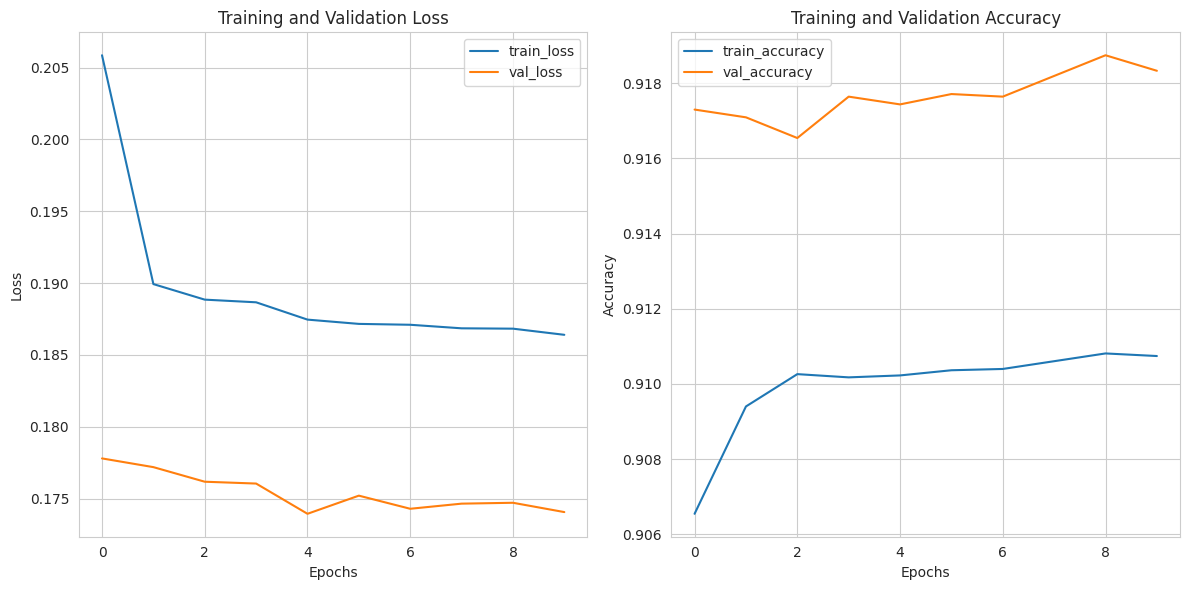

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
model_binary2 = tf.keras.models.Sequential([
    tf.keras.Input(shape=X_train.shape[1:]),
    tf.keras.layers.Dense(64, activation="relu"),
    Dropout(0.5),
    tf.keras.layers.Dense(32, activation="relu"),
    Dropout(0.5),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
model_binary2.compile(optimizer='adam', loss="binary_crossentropy", metrics="accuracy")
model_binary2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                384       
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2497 (9.75 KB)
Trainable params: 2497 (9.75 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history2 = model_binary2.fit(X_train, y_train_full, epochs=15, batch_size=32, verbose=1,  validation_split=(0.2))

Epoch 1/15
1817/1817 [==============================] - 6s 3ms/step - loss: 0.2211 - accuracy: 0.9021 - val_loss: 0.1823 - val_accuracy: 0.9170
Epoch 2/15
1817/1817 [==============================] - 4s 2ms/step - loss: 0.1965 - accuracy: 0.9068 - val_loss: 0.1786 - val_accuracy: 0.9182
Epoch 3/15
1817/1817 [==============================] - 6s 3ms/step - loss: 0.1937 - accuracy: 0.9082 - val_loss: 0.1780 - val_accuracy: 0.9174
Epoch 4/15
1817/1817 [==============================] - 4s 2ms/step - loss: 0.1927 - accuracy: 0.9085 - val_loss: 0.1775 - val_accuracy: 0.9177
Epoch 5/15
1817/1817 [==============================] - 5s 3ms/step - loss: 0.1919 - accuracy: 0.9092 - val_loss: 0.1764 - val_accuracy: 0.9174
Epoch 6/15
1817/1817 [==============================] - 5s 3ms/step - loss: 0.1919 - accuracy: 0.9095 - val_loss: 0.1765 - val_accuracy: 0.9181
Epoch 7/15
1817/1817 [==============================] - 5s 3ms/step - loss: 0.1912 - accuracy: 0.9092 - val_loss: 0.1762 - val_accuracy:

In [ ]:
test_loss2, test_accuracy2 = model_binary2.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy2}, Test loss: {test_loss2}')

568/568 [==============================] - 1s 2ms/step - loss: 0.1827 - accuracy: 0.9136
Test accuracy: 0.9135843515396118, Test loss: 0.18270628154277802


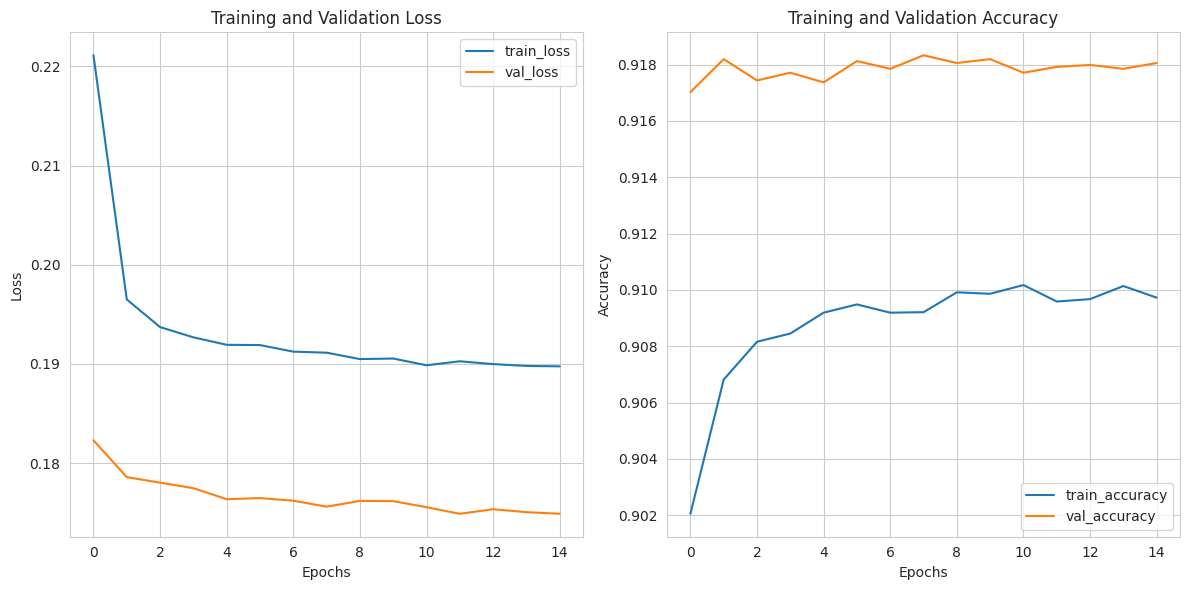

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'], label='train_loss')
plt.plot(history2.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history2.history['accuracy'], label='train_accuracy')
plt.plot(history2.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
bootstrap_samples = []
n_bootstrap_samples = 100  # Number of bootstrap samples
sample_size = len(data)-50000  # Size of each bootstrap sample

for _ in range(n_bootstrap_samples):
    # Generate a random sample with replacement from the original dataset
    bootstrap_sample = data.sample(n=sample_size, replace=True)
    bootstrap_samples.append(bootstrap_sample)

# Concatenate the bootstrap samples into a single DataFrame
bootstrap_df = pd.concat(bootstrap_samples)

# Display the bootstrapped DataFrame
print(bootstrap_df)

             id                 name  est_diameter_min  est_diameter_max  \
86922  54214058         (2021 RZ122)              0.24              0.54   
63499   3774376          (2017 HQ49)              0.06              0.14   
10662   2267136  267136 (2000 EF104)              0.44              0.98   
11195   3728565           (2015 SO2)              0.04              0.10   
36031   3781043          (2017 QK18)              0.03              0.07   
...         ...                  ...               ...               ...   
69064   3728230            (2015 SF)              0.07              0.16   
62547   2528857     528857 (2009 CT)              0.31              0.70   
467     3404525            (2008 EJ)              0.26              0.58   
87048  54209306          (2021 TL14)              0.01              0.02   
2687   54081200           (2020 UR6)              0.18              0.41   

       relative_velocity  miss_distance orbiting_body  sentry_object  \
86922          

In [ ]:
columns_to_encode2 = ['orbiting_body','hazardous']

# Create a OneHotEncoder instance
one_hot_encoder2 = OneHotEncoder(sparse=False, drop='first')

# Encode the specified columns
encoded_columns2 = one_hot_encoder2.fit_transform(bootstrap_df[columns_to_encode])

# Create column names for the encoded features
encoded_column_names2 = one_hot_encoder2.get_feature_names_out(columns_to_encode)

# Reset the index of the DataFrame
bootstrap_df.reset_index(drop=True, inplace=True)

# Replace the original columns with the encoded ones
df_encoded2 = pd.concat([bootstrap_df.drop(columns_to_encode2, axis=1), pd.DataFrame(encoded_columns2, columns=encoded_column_names2)],axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X = df_encoded2
X = X.drop(columns=['id', 'name', 'sentry_object'])
X

est_diameter_min  est_diameter_max  relative_velocity  miss_distance  \
0                    0.24              0.54          44,161.07  54,751,567.63   
1                    0.06              0.14          23,453.89  72,020,598.30   
2                    0.44              0.98          31,277.94  52,935,166.37   
3                    0.04              0.10          63,991.81  72,739,490.63   
4                    0.03              0.07          73,837.11  54,322,704.76   
...                   ...               ...                ...            ...   
4083595              0.07              0.16          81,916.79  11,479,174.70   
4083596              0.31              0.70          48,063.65  29,686,034.28   
4083597              0.26              0.58          72,420.02  71,599,087.92   
4083598              0.01              0.02          21,776.06     478,848.26   
4083599              0.18              0.41          40,001.65  19,812,185.50   

         absolute_magnitude  hazardous_True  
0                     20.22            0.00  
1                     23.10            0.00  
2                     18.91            0.00  
3                     23.90            0.00  
4                     24.50            0.00  
...                     ...             ...  
4083595               22.90            0.00  
4083596               19.66            0.00  
4083597               20.05            0.00  
4083598               26.89            0.00  
4083599               20.83            1.00  

[4083600 rows x 6 columns]

In [ ]:
y = X['hazardous_True'].copy()
X = X.drop(columns=['hazardous_True'])
X

est_diameter_min  est_diameter_max  relative_velocity  miss_distance  \
0                    0.24              0.54          44,161.07  54,751,567.63   
1                    0.06              0.14          23,453.89  72,020,598.30   
2                    0.44              0.98          31,277.94  52,935,166.37   
3                    0.04              0.10          63,991.81  72,739,490.63   
4                    0.03              0.07          73,837.11  54,322,704.76   
...                   ...               ...                ...            ...   
4083595              0.07              0.16          81,916.79  11,479,174.70   
4083596              0.31              0.70          48,063.65  29,686,034.28   
4083597              0.26              0.58          72,420.02  71,599,087.92   
4083598              0.01              0.02          21,776.06     478,848.26   
4083599              0.18              0.41          40,001.65  19,812,185.50   

         absolute_magnitude  
0                     20.22  
1                     23.10  
2                     18.91  
3                     23.90  
4                     24.50  
...                     ...  
4083595               22.90  
4083596               19.66  
4083597               20.05  
4083598               26.89  
4083599               20.83  

[4083600 rows x 5 columns]

In [ ]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X , y , test_size=0.2 ,random_state=42)

In [ ]:
model_binary3 = tf.keras.models.Sequential([
    tf.keras.Input(shape=X_train.shape[1:]),
    tf.keras.layers.Dense(64, activation="relu"),
    Dropout(0.3),
    tf.keras.layers.Dense(64, activation="relu"),
    Dropout(0.4),
    tf.keras.layers.Dense(1, activation="sigmoid")
])
model_binary3.compile(optimizer='adam', loss="binary_crossentropy", metrics="accuracy")
model_binary3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                384       
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dropout_3 (Dropout)         (None, 64)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4609 (18.00 KB)
Trainable params: 4609 (18.00 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history3 = model_binary3.fit(X_train, y_train_full, epochs=15, batch_size=32, verbose=1,  validation_split=(0.5))

Epoch 1/15
1136/1136 [==============================] - 6s 4ms/step - loss: 0.3420 - accuracy: 0.8990 - val_loss: 0.3212 - val_accuracy: 0.9028
Epoch 2/15
1136/1136 [==============================] - 5s 4ms/step - loss: 0.3268 - accuracy: 0.9027 - val_loss: 0.3199 - val_accuracy: 0.9028
Epoch 3/15
1136/1136 [==============================] - 5s 4ms/step - loss: 0.3262 - accuracy: 0.9027 - val_loss: 0.3195 - val_accuracy: 0.9028
Epoch 4/15
1136/1136 [==============================] - 5s 4ms/step - loss: 0.3244 - accuracy: 0.9027 - val_loss: 0.3210 - val_accuracy: 0.9028
Epoch 5/15
1136/1136 [==============================] - 5s 4ms/step - loss: 0.3236 - accuracy: 0.9027 - val_loss: 0.3197 - val_accuracy: 0.9028
Epoch 6/15
1136/1136 [==============================] - 5s 4ms/step - loss: 0.3221 - accuracy: 0.9027 - val_loss: 0.3193 - val_accuracy: 0.9028
Epoch 7/15
1136/1136 [==============================] - 4s 3ms/step - loss: 0.3227 - accuracy: 0.9027 - val_loss: 0.3190 - val_accuracy:

In [ ]:
test_loss3, test_accuracy3 = model_binary3.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy3}, Test loss: {test_loss3}')

25523/25523 [==============================] - 40s 2ms/step - loss: 756672.8750 - accuracy: 0.9035
Test accuracy: 0.9034552574157715, Test loss: 756672.875


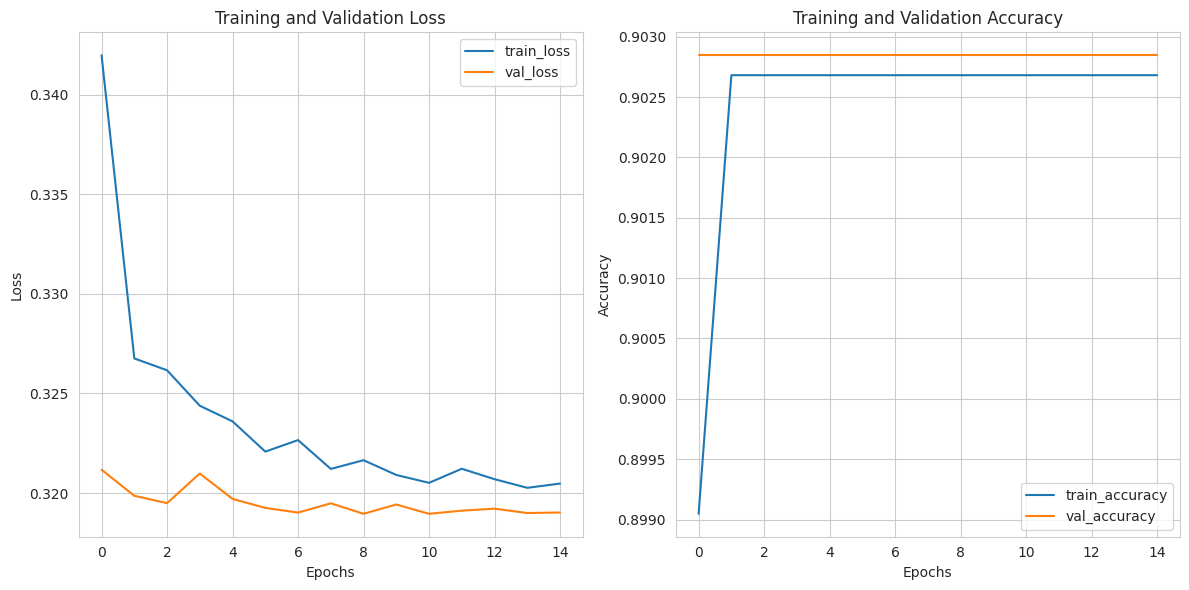

In [ ]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history3.history['loss'], label='train_loss')
plt.plot(history3.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history3.history['accuracy'], label='train_accuracy')
plt.plot(history3.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
pip install keras-tuner --upgrade

In [ ]:
import kerastuner as kt
from sklearn.model_selection import train_test_split

# Define your data (replace X_train, y_train, X_test, y_test with your actual data)
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42)

# Define a hypermodel function
def model_builder(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units_input', min_value=32, max_value=256, step=32), activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dropout(rate=hp.Float('dropout_input', min_value=0.1, max_value=0.5, step=0.1)))

    # Number of hidden layers and units per layer
    for i in range(hp.Int('num_layers', 1, 2)):
        model.add(Dense(units=hp.Int(f'units_{i}', min_value=32, max_value=256, step=32), activation='relu'))
        model.add(Dropout(rate=hp.Float(f'dropout_{i}', min_value=0.1, max_value=0.5, step=0.1)))

    model.add(Dense(1, activation='sigmoid'))

    # Compile the model
     optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

# Instantiate the tuner (using RandomSearch)
tuner = kt.RandomSearch(
    model_builder,
    objective='val_accuracy',
    max_trials=10,
    directory='my_dir',
    project_name='hyperparameter_tuning'
)

# Define callback to stop training early if no improvement in validation loss
stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

# Perform hyperparameter search

tuner.search(X_train, y_train, epochs=3, validation_split=0.2, callbacks=[stop_early])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

print(f"Optimal number of units in the input layer: {best_hps.get('units_input')}")
print(f"Optimal dropout rate in the input layer: {best_hps.get('dropout_input')}")
for i in range(best_hps.get('num_layers')):
    print(f"Optimal number of units in hidden layer {i+1}: {best_hps.get(f'units_{i}')}")
    print(f"Optimal dropout rate in hidden layer {i+1}: {best_hps.get(f'dropout_{i}')}")

# Build the model with the optimal hyperparameters and train it
hypermodel = tuner.hypermodel.build(best_hps)
history = hypermodel.fit(X_train, y_train, epochs=3, validation_split=0.2)

# Evaluate the model
loss4, accuracy4 = hypermodel.evaluate(X_test, y_test)
print("Test Loss:", loss4)
print("Test Accuracy:", accuracy4)

Trial 8 Complete [00h 11m 23s]
val_accuracy: 0.9027788043022156

Best val_accuracy So Far: 0.9027788043022156
Total elapsed time: 02h 12m 26s

Search: Running Trial #9

Value             |Best Value So Far |Hyperparameter
32                |192               |units_input
0.1               |0.3               |dropout_input
1                 |3                 |num_layers
32                |32                |units_0
0.3               |0.1               |dropout_0
256               |32                |units_1
0.5               |0.1               |dropout_1
192               |32                |units_2
0.5               |0.1               |dropout_2

Epoch 1/3
38262/81672 [=============>................] - ETA: 1:34 - loss: 2645.2544 - accuracy: 0.9002

KeyboardInterrupt: 

In [ ]:
y_proba = model_binary3.predict(X_test)
np.array(class_names)[y_pred]
y_proba.astype(int)

25523/25523 [==============================] - 40s 2ms/step


array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])